# Results

In [1]:
from utiles.trainningResultsUtiles import *

## Rmse of Different Models on MovieLens 100k

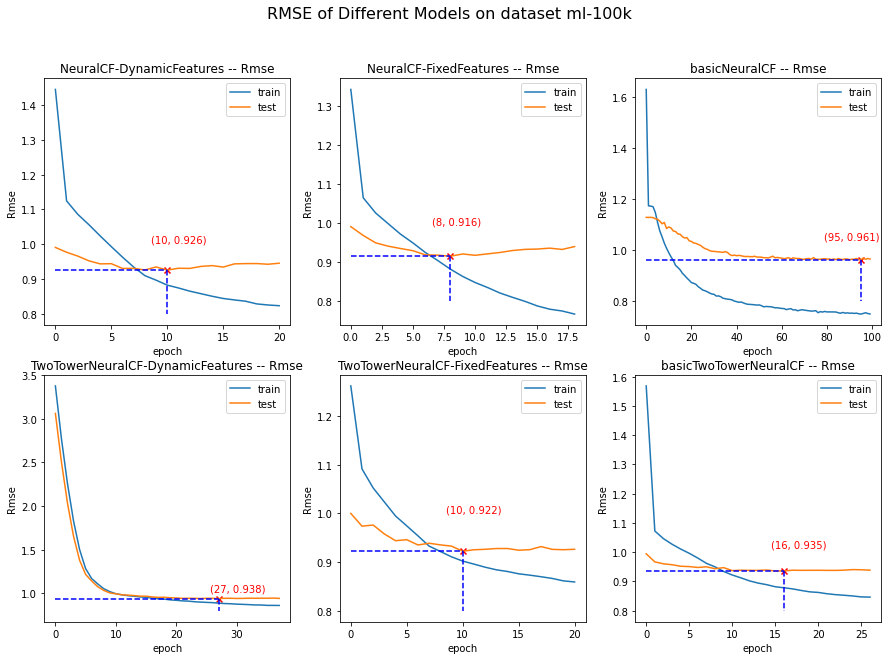

In [2]:
# plot history for ml-100k
results100k = modelResults()
results100k.getPathsByFname('ml-100k')
results100k.loadHistories()
results100k.plotHistories(1) # 1: plot 3 * 2 sub plot 0: single figure for each model

## Rmse of Different Models on MovieLens 1M

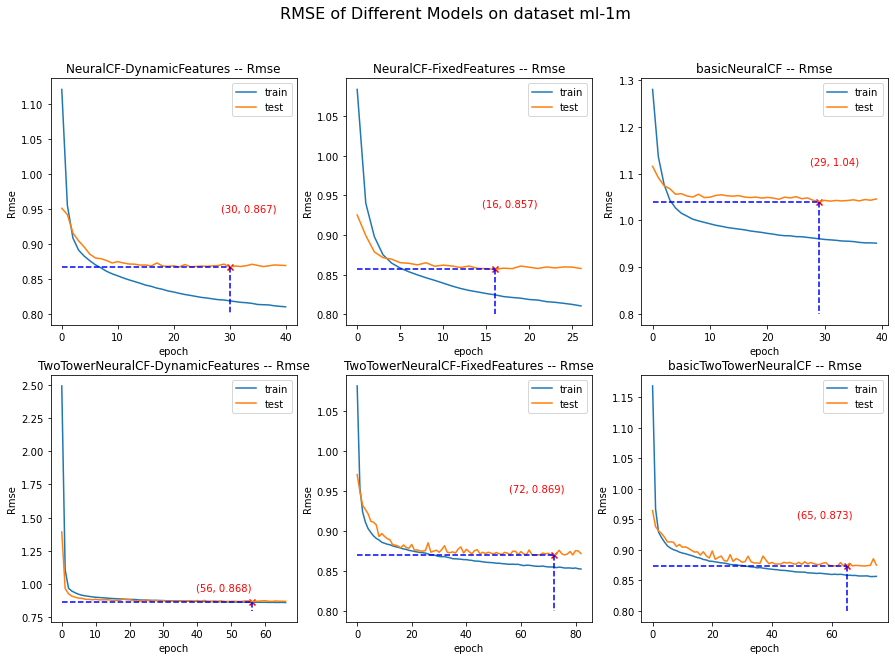

In [3]:
# plot history for ml-1m
results1m = modelResults()
results1m.getPathsByFname('ml-1m')
results1m.loadHistories()
results1m.plotHistories(1) # 1: plot 3 * 2 sub plot 0: single figure for each model

A basic Model means that a model only uses ID as input features. Experiments show us that if we add some features appropriately, the performance will be better.

We can see the results above. The NeuralCF Model with fixed features obtained a high performance on both datasets. For other remained models, Two Tower NeuralCF Model with fixed features is not the best one. The biggest advantage of the Two Tower Model is that we only need to save the embedding vectors of the two tower tops. Then we can use the dot product to calculate the similarity between the vectors.

Next, we will focus on Two Tower NeuralCF with Fixed Features on MovieLens 100k dataset.

# Generate User Tower and Movie Twoer Inputs Data

This part, we focus on the generate the input data(tensorflow Dataset) for each Tower. 

In [4]:
tfDataset100k = tfInputGenerater('ml-100k')
print(tfDataset100k.users, '\n')
print(tfDataset100k.movies, '\n')
print(tfDataset100k.usersDF.head(), '\n')
print(tfDataset100k.moviesDF.head(), '\n')

<PrefetchDataset shapes: OrderedDict([(userId, (None,)), (ageGroup, (None,)), (gender, (None,)), (occupation, (None,)), (location, (None,))]), types: OrderedDict([(userId, tf.int32), (ageGroup, tf.string), (gender, tf.string), (occupation, tf.string), (location, tf.string)])> 

<PrefetchDataset shapes: OrderedDict([(movieId, (None,)), (movieGenre1, (None,)), (movieGenre2, (None,)), (movieGenre3, (None,))]), types: OrderedDict([(movieId, tf.int32), (movieGenre1, tf.string), (movieGenre2, tf.string), (movieGenre3, tf.string)])> 

   userId ageGroup gender  occupation location
0       0    18-24      M  technician       AZ
1       1    50-55      F       other       CA
2       2    18-24      M      writer       FL
3       3    18-24      M  technician       OH
4       4    25-34      F       other       PA 

   movieId movieGenre1 movieGenre2 movieGenre3
0        0   Animation   Childrens      Comedy
1        1      Action   Adventure    Thriller
2        2    Thriller         NaN       

In [5]:
tfDataset1m = tfInputGenerater('ml-1m')
print(tfDataset1m.users, '\n')
print(tfDataset1m.movies, '\n')
print(tfDataset1m.usersDF.head(), '\n')
print(tfDataset1m.moviesDF.head(), '\n')

<PrefetchDataset shapes: OrderedDict([(userId, (None,)), (age, (None,)), (gender, (None,)), (occupation, (None,)), (location, (None,))]), types: OrderedDict([(userId, tf.int32), (age, tf.string), (gender, tf.string), (occupation, tf.string), (location, tf.string)])> 

<PrefetchDataset shapes: OrderedDict([(movieId, (None,)), (movieGenre1, (None,)), (movieGenre2, (None,)), (movieGenre3, (None,))]), types: OrderedDict([(movieId, tf.int32), (movieGenre1, tf.string), (movieGenre2, tf.string), (movieGenre3, tf.string)])> 

   userId           age gender            occupation location
0       0      Under 18      F          K-12 student       MI
1       1  More than 56      M         self-employed       LA
2       2         25-34      M             scientist       MN
3       3         45-49      M  executive/managerial       MA
4       4         25-34      M                writer       MN 

   movieId movieGenre1 movieGenre2 movieGenre3
0        0   Animation  Children's      Comedy
1       

# Extract User Embedding and Item Embedding from Two Tower NeuralCF Model with Fixed Features

Now, we have generated the input features of user Tower and movie Tower, this step, we will extract the embedding vectors of users and movies.

In [6]:
fname = 'ml-100k'
modelName = 'TwoTowerNeuralCF-FixedFeatures'

## Load Original Model

In [7]:
results100k = modelResults()
results100k.getSinglePathOfModel(fname, modelName)
modelPath = results100k.checkpointPath
TwoTowerNeuralCF_FixedFeaturesModel = tf.keras.models.load_model(modelPath)

In [8]:
TwoTowerNeuralCF_FixedFeaturesModel.summary(line_length=150)

Model: "TwoTowerNeuralCF-FixedFeatures"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
movieGenre1 (InputLayer)                         [(None, 1)]                      0                                                                   
______________________________________________________________________________________________________________________________________________________
movieGenre2 (InputLayer)                         [(None, 1)]                      0                                                                   
______________________________________________________________________________________________________________________________________________________
movieGenre3 (InputLayer)                         [(Non

In [9]:
# original train test dataset
train, test = getTrainTestDataset(fname)
# evaluate on original train test dataset
test_loss, test_rmse, test_mae = TwoTowerNeuralCF_FixedFeaturesModel.evaluate(test)
print('\n\nTest Loss {}, Test rmse {}, Test mae {}'.format(test_loss, test_rmse, test_mae))

/home/zhaochi/.conda/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:592: UserWarning: Input dict contained keys ['timestamp', 'age', 'label', 'releaseYear', 'movieRatingCount', 'movieAvgRating', 'movieRatingStddev', 'userRatedMovie1', 'userRatedMovie2', 'userRatedMovie3', 'userRatedMovie4', 'userRatedMovie5', 'userRatingCount', 'userAvgReleaseYear', 'userReleaseYearStddev', 'userAvgRating', 'userRatingStddev', 'userGenre1', 'userGenre2', 'userGenre3', 'userGenre4', 'userGenre5'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


79/79 [==============================] - 1s 2ms/step - loss: 0.8504 - root_mean_squared_error: 0.9222 - mae: 0.7316


Test Loss 0.8504452109336853, Test rmse 0.9221958518028259, Test mae 0.7315878868103027


## Extract Two Tower from Original Model

In [10]:
fname = 'ml-100k'
tfDataset100k = tfInputGenerater(fname)

In [11]:
Tower100k = Tower('ml-100k')
Tower100k.getEmbeddingInfor()

The shape of usersEmbedding Matrix is:	 (943, 128)
The shape of moviesEmbedding Matrix is:	 (1662, 128)
The weight of last layer is:	 0.7066853046417236
The bias of last layer is:	 2.0932774543762207


In [12]:
Tower1m = Tower('ml-1m')
Tower1m.getEmbeddingInfor()

The shape of usersEmbedding Matrix is:	 (6040, 128)
The shape of moviesEmbedding Matrix is:	 (3702, 128)
The weight of last layer is:	 0.010609587654471397
The bias of last layer is:	 2.267054319381714
